# EfficientNetB6 Testing

In [1]:
import kagglehub

path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

100%|██████████| 586M/586M [00:03<00:00, 185MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2


In [2]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2"
print("Dataset contents:", os.listdir(dataset_path))


Dataset contents: ['translate.py', 'raw-img']


In [3]:
import os
import shutil


dataset_path = "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img"


translate = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "ragno": "spider",
    "scoiattolo": "squirrel"
}


for italian_name, english_name in translate.items():
    old_folder = os.path.join(dataset_path, italian_name)
    new_folder = os.path.join(dataset_path, english_name)

    if os.path.exists(old_folder) and not os.path.exists(new_folder):
        shutil.move(old_folder, new_folder)
        print(f"Renamed: {italian_name} → {english_name}")
    elif os.path.exists(new_folder):
        print(f"Already renamed: {english_name}")
    else:
        print(f"Folder not found: {italian_name}")

print("success")


Renamed: cane → dog
Renamed: cavallo → horse
Renamed: elefante → elephant
Renamed: farfalla → butterfly
Renamed: gallina → chicken
Renamed: gatto → cat
Renamed: mucca → cow
Renamed: pecora → sheep
Renamed: ragno → spider
Renamed: scoiattolo → squirrel
success


In [4]:
class_names = ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
print("Updated class names:", class_names)


Updated class names: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [5]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img"

current_folders = sorted(os.listdir(dataset_path))

print("Current folders:", current_folders)

Current folders: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.5,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)


val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_dataset = train_datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img",
    target_size=(64, 64),
    batch_size=32,
    class_mode="categorical",
    subset="training",
    seed=42
)


test_dataset = val_datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img",
    target_size=(64, 64),
    batch_size=32,
    class_mode="categorical",
    subset="validation",
    seed=42
)


Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [7]:
import os

dataset_dir = "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img"

valid_extensions = ['.jpg', '.jpeg', '.png']
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        images = [f for f in os.listdir(class_path) if any(f.endswith(ext) for ext in valid_extensions)]
        print(f"{class_name}: {len(images)} valid images")



sheep: 1820 valid images
spider: 4821 valid images
squirrel: 1862 valid images
cow: 1866 valid images
elephant: 1446 valid images
cat: 1668 valid images
dog: 4863 valid images
butterfly: 2112 valid images
chicken: 3098 valid images
horse: 2623 valid images


# Training and Testing dataset

In [8]:
import numpy as np
import tensorflow as tf


train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img",
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=42
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img",
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=42
)

def save_dataset(dataset, file_prefix):
    X_list, y_list = [], []
    for images, labels in dataset:
        X_list.append(images.numpy())
        y_list.append(labels.numpy())

    X_array = np.concatenate(X_list, axis=0)
    y_array = np.concatenate(y_list, axis=0)

    np.save(f"{file_prefix}_X.npy", X_array)
    np.save(f"{file_prefix}_y.npy", y_array)


save_dataset(train_dataset, "train")
save_dataset(test_dataset, "test")


X_train = np.load("train_X.npy")
y_train = np.load("train_y.npy")
X_test = np.load("test_X.npy")
y_test = np.load("test_y.npy")

print(X_train.shape, y_train.shape)


Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
(20944, 128, 128, 3) (20944,)


# Visualization of dataset

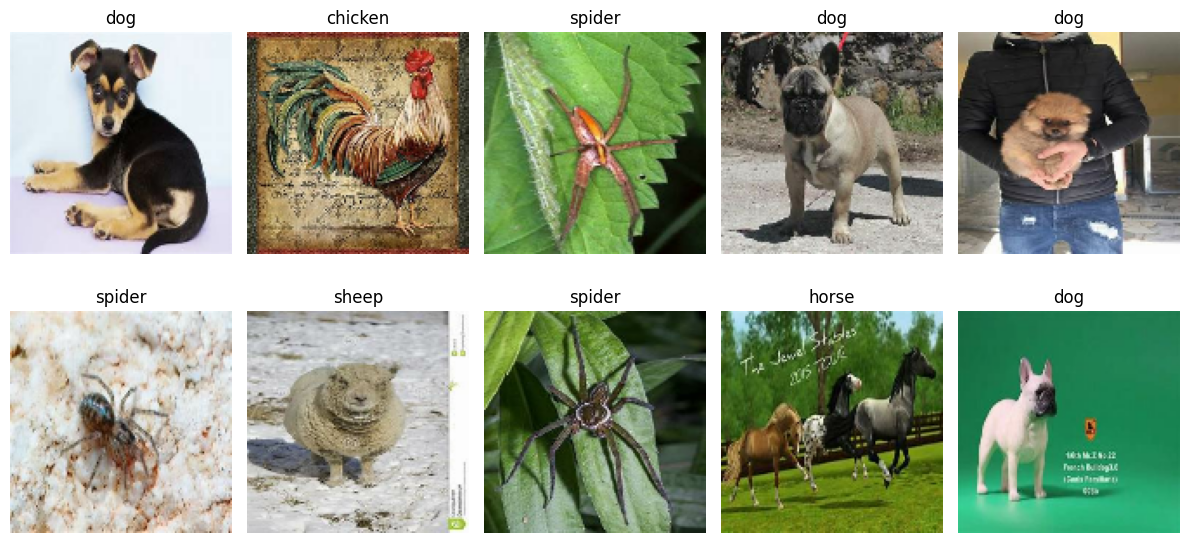

In [9]:

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import to_categorical


class_names = train_dataset.class_names

num_images = 10
indices = random.sample(range(X_train.shape[0]), num_images)


fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

for i, idx in enumerate(indices):
    axes[i].imshow(X_train[idx].astype("uint8"))
    axes[i].set_title(class_names[y_train[idx]])
    axes[i].axis("off")

plt.tight_layout()
plt.show()

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Transfer Model - ImageNet model called EfficientNetB6

It is expected that this model will perform better than our own CNN model, as it is leveraging it's training on millions of images. We selected it due to its optimized scaling of depth, width, and resolution,
making it more efficient and accurate compared to traditional CNNs.

**note:** The base model is frozen to retain pre-trained ImageNet features and prevent overfitting. We could unfreeze if we wish to proceed with fine-tuning.


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.applications import EfficientNetB6
from tensorflow.keras.optimizers import Adam

# Step 1: Load EfficientNetB6 pretrained on ImageNet
base_model = EfficientNetB6(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # this can reduce overfitting
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.6),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # 10 classes
])

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb6 (Functional)          │ (None, 4, 4, 2304)          │      40,960,143 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2304)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,274,201 (161.26 MB)

 Trainable params: 1,314,058 (5.01 MB)

 Non-trainable params: 40,960,143 (156.25 MB)

# Fitting the model, training for 64 batches.

In [15]:
history_1 = model.fit(X_train, y_train, # in this training we used a batch size of 64.
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 117s 180ms/step - accuracy: 0.7818 - loss: 1.7385 - val_accuracy: 0.9114 - val_loss: 0.9260
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8932 - loss: 0.9311 - val_accuracy: 0.9140 - val_loss: 0.6980
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8996 - loss: 0.7231 - val_accuracy: 0.9167 - val_loss: 0.6077
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8994 - loss: 0.6602 - val_accuracy: 0.9182 - val_loss: 0.5638
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9011 - loss: 0.6208 - val_accuracy: 0.9167 - val_loss: 0.5568
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8997 - loss: 0.6131 - val_accuracy: 0.9146 - val_loss: 0.5481
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9082 - loss: 0.5848 - val_accuracy: 0.9198 - val_loss: 0.5329
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9025 - loss: 0.5918 

# Plotting Val accuracy and Validation loss

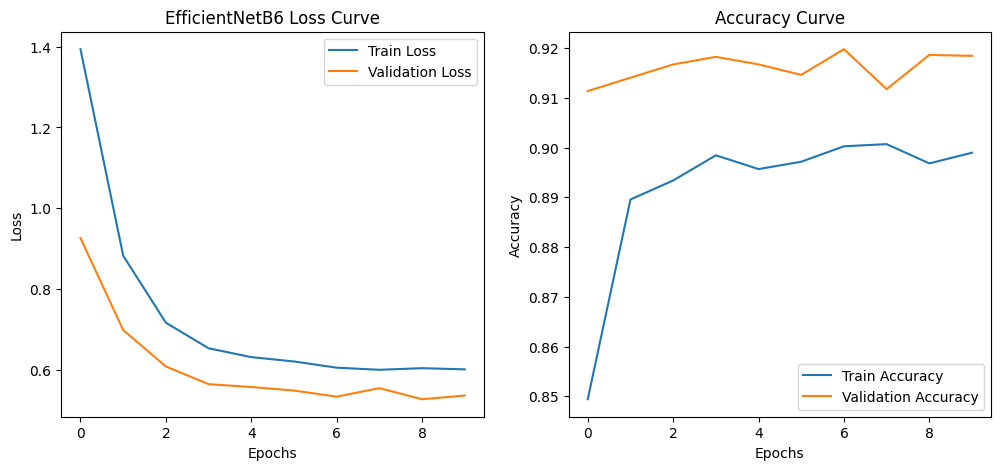

In [16]:
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
train_acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

# Plot Loss Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('EfficientNetB6 Loss Curve')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━

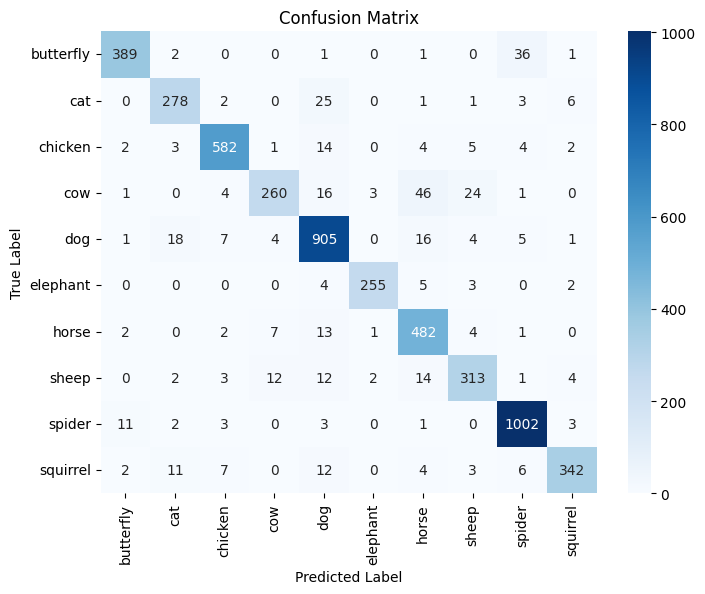

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))


print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_dataset.class_names))


macro_f1 = f1_score(y_true, y_pred, average="macro")
weighted_f1 = f1_score(y_true, y_pred, average="weighted")

print(f"\nMacro F1-Score: {macro_f1:.4f}")
print(f"Weighted F1-Score: {weighted_f1:.4f}")


cm = confusion_matrix(y_true, y_pred)
class_names = test_dataset.class_names


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Saving the model, loading it and testing on a test-image of a cat.

In [ ]:
model.save("efficientnetb6_model.keras") #saving the model


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("efficientnetb6_model.keras")

model.summary()


# Loading and resizing a test image of a cat

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
The given image is of 
Class: 8 
Animal: spider


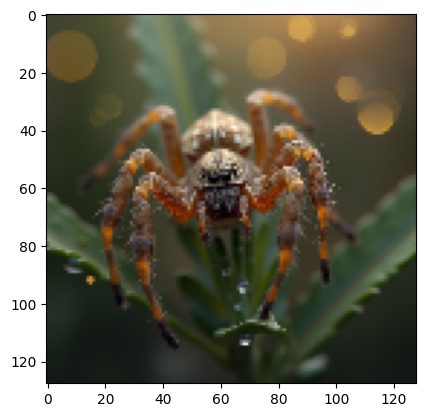

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

def predictor(img, model):
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (128, 128))
    plt.imshow(image)
    image = image.reshape(1, 128,128,3)
    label_names = train_dataset.class_names
    dict_class = dict(zip(list(range(len(label_names))), label_names))
    clas = model.predict(image).argmax()
    name = dict_class[clas]
    print('The given image is of \nClass: {0} \nAnimal: {1}'.format(clas, name))
my_model = models.load_model('/content/efficientnetb6_model.keras')
predictor('/content/spider_test_1.jpg',my_model)